In [228]:
import torch
from torch import nn #* nn contains all of building blocks for neural networks 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

print(torch.__version__)

2.1.2+cu118


### What we are going to cover 

* 1 - Data (prepare your data)
* 2 - Build your model 
* 3 - Fitting model to data (train)
* 4 - Making predictions and evaluating model
* 5 - Saving and loading the model
* 6 - Putting it all together 

### 1- Data Preparing and Loading

* Data can be anything in machine learningn such as 
    1. Excel Spreadheet 
    2. Images of any king 
    3. Videos (Youtube has lots of data)
    4. Audio like songs and podcast 
    5. Texts 
    6. DNA 

* Machine Learning is a game of two parts :
    1. Get data into a numerical representation 
    2. Build a model to learn patterns in that numerical learning 

To showcase this we will use a linear regression formula to make a straight line with known parameters

In [229]:
# Create known parameters 
weight = 0.7 
bias = 0.3 

# Create 
start  = 0
end = 1
step = 0.02
X = torch.arange(start, end,step).unsqueeze(dim=1)
y = bias+weight*X

In [230]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [231]:
len(X),len(y)

(50, 50)

In [232]:
### Splitting data into Test and Training part

In [233]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:] 

In [234]:
print(f'X_trian:{len(X_train)}, X_test:{len(X_test)}, y_train:{len(y_train)} y_test:{len(y_test)}')

X_trian:40, X_test:10, y_train:40 y_test:10


### Visualizing the Data

In [235]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    """ Plots training data , test data and compare predictions """
    plt.figure(figsize=(10,7))
    
    # plot the training in blue 
    plt.scatter(train_data,train_labels,c='b',s=4,label='Training Data')
    
    # plot the test data in green 
    plt.scatter(test_data,test_labels,c='g',s=4,label='Testing Data')
    
    if predictions is not None:
        #* Plot the predictions if they exists 
        plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
        
    plt.legend(prop={"size":14})

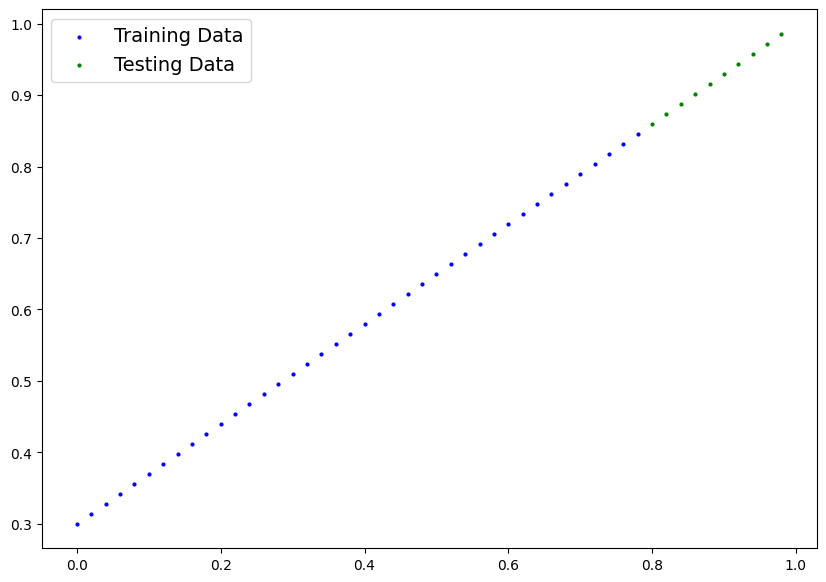

In [236]:
plot_predictions()

In [237]:
### Build first PyTorch Model
class LinearRegressionModel(nn.Module):
    
    def __init__(self) :
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        
        
    #* Forward method to define computation in the model 
    def forward(self,X:torch.Tensor) -> torch.Tensor:
        return self.weights*X + self.bias
         
        

### What our model does: 
* Starts with random values (weight&bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values used to create data)

How does it do so? 
1. Gradient Descent 
2. BackPropagation

### PyTorch Building model Essentials
* torch.nn contains all of the buildings for computational graphs (another word for neural network is computational graph)
* Parameters - with parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn module is base class for all neural network class, if you subclass it, you should override forward() method

* torch.optim this is where the optimizers in PyTorch live, they will help with gradient descent 

### Checking the contents of our PyTorch Model 

* Now we've created a model, lets see what is inside of it 

So we can check our model parameters or what is inside of it using models.parameters 

In [238]:

#* Create a random seed 
torch.manual_seed(42)

#* Intance of our model (this is a subclass of nn.Model)
model_0 = LinearRegressionModel()

### Getting the models parameters or informations 

In [239]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [240]:
#* List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using **torch.inference_model()**

* To check our model's predictive power, lets see how well it predicts 'y_test' based on 'x_test'

* When we pass data into our model, it is going to run it through forward method. 

In [241]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [242]:

#* Make predictions with the model 
with torch.inference_mode():
    y_pred = model_0(X_test)
    
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

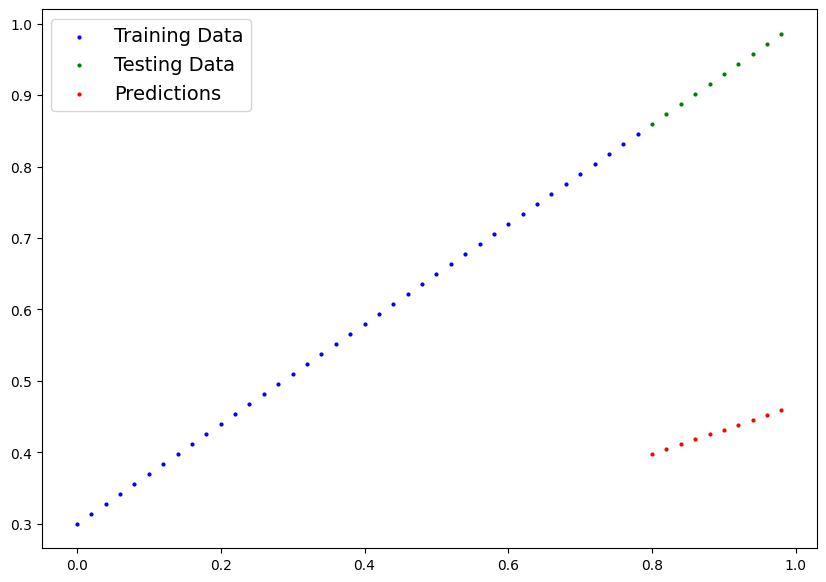

In [243]:
plot_predictions(predictions=y_pred)

### Training the model 

- The whole idea of training is for a model to move from move some *unknown* (these may be random) to some *known* parameters
- or in other words from a poor representation of the data to a better representation of the data 
- One way to measure how poor or wrong is our prediction is using **loss functions**

Note: Loss function may also be called cost funtion or criterion in different ares. For our case we are going to refer it as loss function

**Things We Need To Train:**

* **Loss Function: A function to measure how wrong is our model predictions to the ideal output ***(LOWER IS BETTER)***
* **Optimizer: Takes into account the loss of the model and adjust the models parameters the model's parameters (e.g. weight & bias) to improve the loss function. 


And specificly for PyTorch we need 
-     training loop 
-     testing loop

In [244]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [245]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Set-up a Loss Function

In [246]:
loss_fn = nn.L1Loss()


### Set-up a Optimizer

In [247]:
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001)

### Building a Training and Testing Loop

A couple of things required for a training loop: 
0. Loop through the data 
1. Forward Pass (this involwes data moving through our models forward() function) to make predictions -> Alo called Forward Propagation 
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad 
4. Loss backward -> move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss **backpropagation**
5. Optimizer step -> use the optimizer to adjust our model parameter to try and improve our loss **gradient descent**

In [251]:
# An epoch is one loop through the data 
epochs = 1500


#* Track model different values
epoch_count = []
loss_values = []
test_loss_values = []


#* Step.0 loop through the data 
for epoch in range(epochs):
    # set the model to training mode 
    model_0.train() #* train mode in PyTorch sets all parameters that require gradients to require gradient
    
    #* Step.1 Forward pass 
    y_pred = model_0(X_train)
    
    #* Step.2 Calculate Loss
    loss = loss_fn(y_pred,y_train)
    print(f'epoch:{epoch},  loss: {loss}')
    
    #* Step.3 Optimizer zero grad 
    optimizer.zero_grad()
    
    #* Step.4 Perform backpropagation on the loss with respect to the parameters of the model 
    loss.backward()
    
    #* Step.5 The optimizer steps the gradient descent 
    optimizer.step()
    
    with torch.inference_mode():
        #* 1. forward pass 
        test_pred = model_0(X_test)
        
        #* 2. calculate the loss 
        test_loss = loss_fn(test_pred,y_test)
        
    if (epoch+1) % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ')
            
    
# model_0.eval() #* turns off the gradient tracking in the model that not needed for evaluation/testing (dropout/batch norm layers)


#* Print out model state_dict()
model_0.state_dict()
    

epoch:0,  loss: 0.007186878472566605
epoch:1,  loss: 0.007152761332690716
epoch:2,  loss: 0.007118356879800558
epoch:3,  loss: 0.007083857897669077
epoch:4,  loss: 0.007049829699099064
epoch:5,  loss: 0.00701494887471199
epoch:6,  loss: 0.006981306709349155
epoch:7,  loss: 0.006946398876607418
epoch:8,  loss: 0.0069124214351177216
epoch:9,  loss: 0.006877870764583349
Epoch: 9 | Loss: 0.006877870764583349 | Test Loss: 0.015988875180482864 
epoch:10,  loss: 0.006843519397079945
epoch:11,  loss: 0.006809352431446314
epoch:12,  loss: 0.00677460664883256
epoch:13,  loss: 0.00674082338809967
epoch:14,  loss: 0.006705933716148138
epoch:15,  loss: 0.006672080606222153
epoch:16,  loss: 0.006637400947511196
epoch:17,  loss: 0.006603178568184376
epoch:18,  loss: 0.006568872835487127
epoch:19,  loss: 0.006534276995807886
Epoch: 19 | Loss: 0.006534276995807886 | Test Loss: 0.015230161137878895 
epoch:20,  loss: 0.006500349845737219
epoch:21,  loss: 0.006465443875640631
epoch:22,  loss: 0.0064317397

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [252]:
# print(f'epochs:{epoch_count} | \n test_loss_values:{test_loss_values} |\n  loss_values:{loss}')
epoch_count, loss_values, test_loss_values

([9,
  19,
  29,
  39,
  49,
  59,
  69,
  79,
  89,
  99,
  109,
  119,
  129,
  139,
  149,
  159,
  169,
  179,
  189,
  199,
  209,
  219,
  229,
  239,
  249,
  259,
  269,
  279,
  289,
  299,
  309,
  319,
  329,
  339,
  349,
  359,
  369,
  379,
  389,
  399,
  409,
  419,
  429,
  439,
  449,
  459,
  469,
  479,
  489,
  499,
  509,
  519,
  529,
  539,
  549,
  559,
  569,
  579,
  589,
  599,
  609,
  619,
  629,
  639,
  649,
  659,
  669,
  679,
  689,
  699,
  709,
  719,
  729,
  739,
  749,
  759,
  769,
  779,
  789,
  799,
  809,
  819,
  829,
  839,
  849,
  859,
  869,
  879,
  889,
  899,
  909,
  919,
  929,
  939,
  949,
  959,
  969,
  979,
  989,
  999,
  1009,
  1019,
  1029,
  1039,
  1049,
  1059,
  1069,
  1079,
  1089,
  1099,
  1109,
  1119,
  1129,
  1139,
  1149,
  1159,
  1169,
  1179,
  1189,
  1199,
  1209,
  1219,
  1229,
  1239,
  1249,
  1259,
  1269,
  1279,
  1289,
  1299,
  1309,
  1319,
  1329,
  1339,
  1349,
  1359,
  1369,
  1379,
  1389,

### Plot the loss curve 

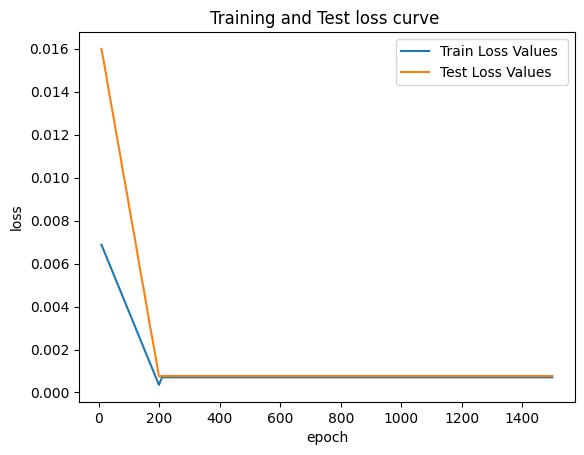

In [253]:
plt.plot(epoch_count ,torch.tensor(loss_values).numpy(),label='Train Loss Values ')
plt.plot(epoch_count,test_loss_values,label='Test Loss Values ')
plt.title('Training and Test loss curve ')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

In [254]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [255]:
weight,bias

(0.7, 0.3)

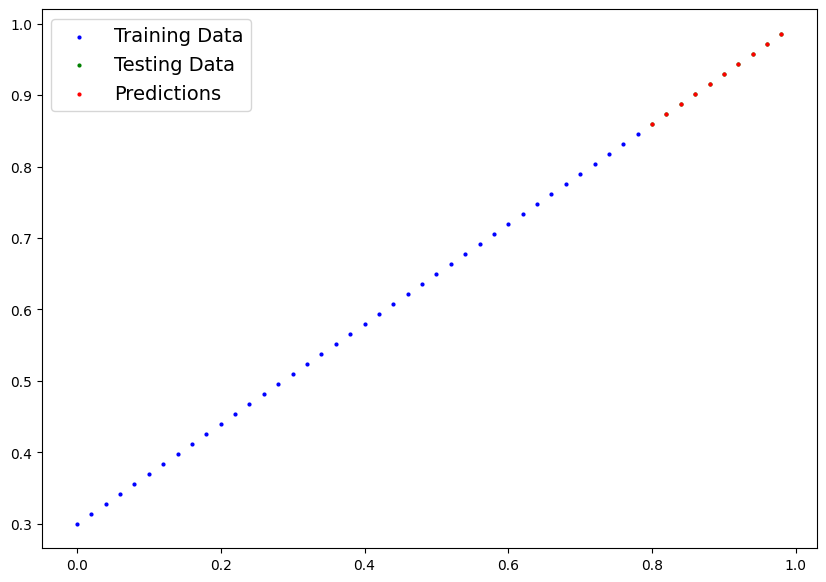

In [256]:
with torch.inference_mode():
    y_pred = model_0(X_test)


plot_predictions(predictions= y_pred)

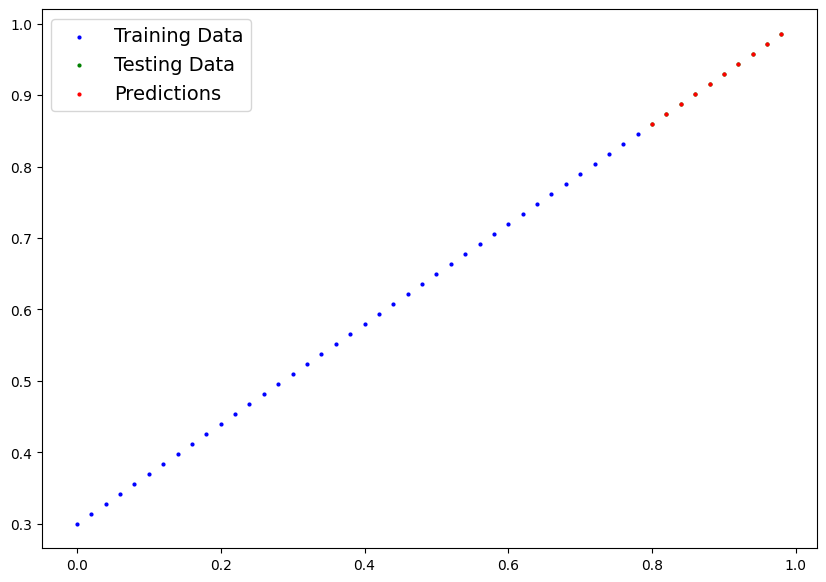

In [258]:
with torch.inference_mode():
    y_pred = model_0(X_test)


plot_predictions(predictions= y_pred)

### Saving the Model 

* There are three main methods you should know about for saving and loading models in PyTorch
-     torch.save( )    -allows you to save a PyTorch object in Python's picke format 
-     torch.load( )    -allows you load a saved PyTorch object 
-     torch.nn.Module.load_state_dict( ) -this allows to load a model's saved state dictionary 

In [259]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [265]:
from pathlib import Path

#* create model's directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


#* Create model's save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


#* Save the model_state_dict 
print(f'model saving to {model_0.state_dict(),MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

model saving to (OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))]), WindowsPath('models/01_pytorch_workflow_model_0.pth'))


In [264]:
MODEL_SAVE_PATH

WindowsPath('models/01_pytorch_workflow_model_0.pth')

### Loading PyTorch Saved Model

Since we saved our model state as 'state_dict()' rather the entire model we will create a new instance of model class and load the saved state dict into that  

In [271]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [272]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [273]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [274]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)
    
loaded_model_0_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [278]:
# Compare loaded model preds with original models 
model_0.eval()
with torch.inference_mode():
    y_pred = model_0(X_test)
    
y_pred == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])